In [1]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

In [4]:
import tensorflow.keras.models

In [120]:
check = tensorflow.keras.models.load_model('/content/drive/MyDrive/my_model1.h5')

In [121]:
BER=[]
MSE=[]

In [218]:
dis35 = pd.read_csv("/content/drive/MyDrive/ofdm data/data/distorted_40db_test.csv", header=None)
des35 = pd.read_csv("/content/drive/MyDrive/ofdm data/data/desired_40db_test.csv", header=None)
print(len(des35))

100


In [219]:
def create_packets(data):
  sample = []
  xs = []
  rn = len(data)

  if rn%16 == 0:
    pass
  else:
    rn = rn - rn%16

  for i in range(0,rn,16):
    xs.append(data[0][i:i+16])

    sample.append(xs)
    xs = []

  sample = np.array(sample)
  sample = sample.reshape(int(rn/16), 16, 1)
  return(sample)

In [220]:
dis_chk = create_packets(dis35)
des_chk = create_packets(des35)

In [221]:
## Scale the data

def scale_data(X,y):
  scaler = MinMaxScaler()
  X = X.reshape(X.shape[0], X.shape[1])
  y = y.reshape(y.shape[0], y.shape[1])
  
  distorted_scaled = scaler.fit_transform(X)
  desired_scaled = scaler.fit_transform(y)
  
  distorted_scaled = distorted_scaled.reshape(distorted_scaled.shape[0], distorted_scaled.shape[1], 1)
  desired_scaled = desired_scaled.reshape(desired_scaled.shape[0], desired_scaled.shape[1], 1)

  return distorted_scaled, desired_scaled

In [222]:
scl_dis_chk ,  scl_des_chk = scale_data(dis_chk, des_chk)

In [223]:
def minMaxDenormalize(y, a, b):
  x = (y * (b - a) + a)
  return x

In [224]:
full_out = check.predict(scl_dis_chk)
full_out = full_out.reshape(len(scl_dis_chk)*16)
desired_scaled = scl_des_chk.reshape(len(scl_des_chk)*16)
dff=minMaxDenormalize(full_out,-1,1)
dff1=minMaxDenormalize(desired_scaled,-1,1)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dff1, dff)
print(mse)

0.25014418379476905


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


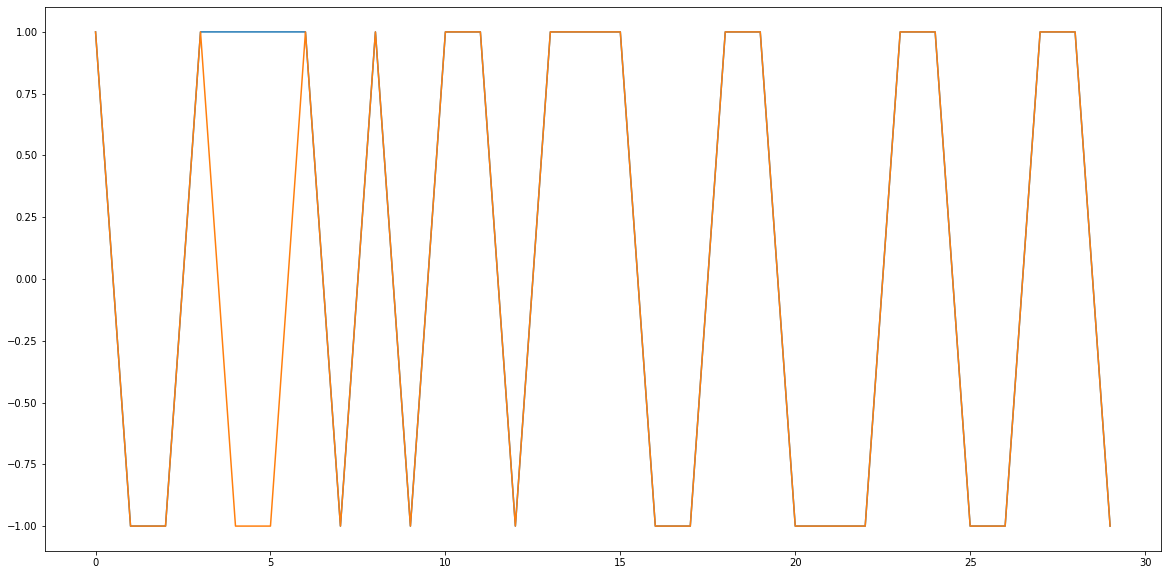

In [225]:
plt.figure(figsize=(20,10))
plt.plot(dff[0:30])
plt.subplot()
plt.plot(dff1[0:30])

In [226]:
corr = 0
for i in range(len(dff)):
  if dff[i] == dff1[i]:
    corr += 1

In [227]:
ber= (len(dff1)-corr)/len(dff1)
print(len(dff1), corr, len(dff1)-corr, ber)



96 87 9 0.09375


In [228]:
MSE.append(mse)
BER.append(ber)

In [229]:
print(BER) 
print(MSE)

[0.4479166666666667, 0.10416666666666667, 0.08333333333333333, 0.0625, 0.052083333333333336, 0.041666666666666664, 0.03125, 0.010416666666666666, 0.09375]
[1.7084756271641577, 0.2128370732148187, 0.12500008180798564, 0.16661035370304475, 0.12467327464955913, 0.12499997516473509, 0.0785791198314459, 1.8133642735544222e-15, 0.25014418379476905]


In [230]:
res = {'SNR': ['0 dB','5 dB', '10 dB', '15 dB', '20 dB', '25 dB', '30 dB', '35 dB', '40 dB'], 'MSE': MSE,'BER':BER}
result = pd.DataFrame(data=res)

In [231]:
result

,SNR,MSE,BER
0,0 dB,1.708476e+00,0.447917
1,5 dB,2.128371e-01,0.104167
2,10 dB,1.250001e-01,0.083333
3,15 dB,1.666104e-01,0.062500
4,20 dB,1.246733e-01,0.052083
5,25 dB,1.250000e-01,0.041667
6,30 dB,7.857912e-02,0.031250
7,35 dB,1.813364e-15,0.010417
8,40 dB,2.501442e-01,0.093750


In [232]:
result.to_csv('/content/drive/MyDrive/ofdm data/Result/result.csv')

In [233]:
y = result['BER']

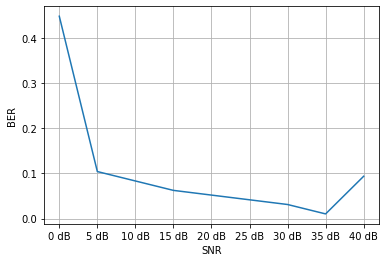

In [234]:
plt.plot(y)
plt.xlabel('SNR')
plt.ylabel('BER')
plt.xticks(ticks=np.arange(0,9), labels=result['SNR'])
plt.grid()
plt.show()